In [1]:
#Importing important libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Creating list of column name I know the order because I have seen the dataset once..
column_names = ['User_id','item_id','Rating','Timestamp']

In [3]:
#Read data with help of pandas
df = pd.read_csv('u.data',sep = '\t',names=column_names)

In [4]:
#Read data with help of pandas
movies_title = pd.read_csv('Movie_Id_Titles')

In [5]:
#Merging both dataset on basis of index..
df = df.merge(movies_title,on='item_id')

In [6]:
#Adding some background for clarity..
sns.set_style('whitegrid')

In [8]:
#Grouping by title and storing the mean of the rating..
rating = pd.DataFrame(df.groupby('title')['Rating'].mean())

In [9]:
#Creating new feature..No of rating
rating['No of rating'] = pd.DataFrame(df.groupby('title')['Rating'].count())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B029ACC88>]],
      dtype=object)

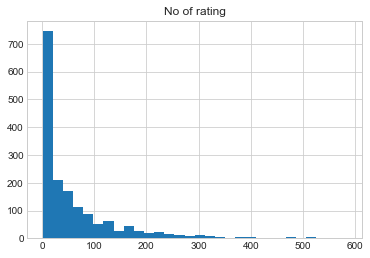

In [10]:
#Now , Doing some EDA 
rating.hist(['No of rating'],bins=30)

Here we conclude , that most movies have got a bad rating..

Text(0,0.5,'No of rating')

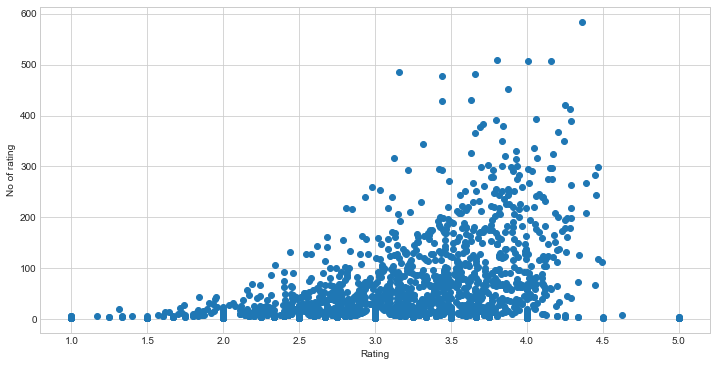

In [11]:
#Some more EDA.. ;-)
plt.figure(figsize=(12,6))
plt.scatter(x='Rating',y='No of rating',data=rating)
plt.xlabel('Rating')
plt.ylabel('No of rating')

Here we can conclude that good movies are being watched by many person as the rating increases no of rating increases Quiet true nobody wants to see low rating movies.. 

In [12]:
#Now apply pivot_table to create a new table on basis of Rating as values,User_id as index , title as columns.. 
moviemat = df.pivot_table(index='User_id',columns='title',values='Rating')

In [13]:
#Selecting our first movie..
star_war_rating = moviemat['Star Wars (1977)']

In [14]:
#Selecting our second movie..
liar_lair_rating = moviemat['Liar Liar (1997)']

In [15]:
#Now trying to correlate other movies with starwar on the basis of rating and storing the result
similar_to_starwar = moviemat.corrwith(star_war_rating)

C:\Users\kiit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kiit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [16]:
#Creating the Dataframe for similar_to_starwar..
corr_starwar = pd.DataFrame(data=similar_to_starwar,columns=['Correlation'])

In [17]:
#Droping out the NULL values..
corr_starwar.dropna(inplace=True)

In [18]:
#NOw joing the No of rating with the dataframe.
corr_starwar = corr_starwar.join(rating['No of rating'])

In [19]:
#Now taking out only does cases where No of rating is greater than 100 and arranging it on basis of Correlation feature..
corr_starwar[corr_starwar['No of rating']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,No of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


So the result here says that , above are the movie which are the most correlated to the star wars..Star Wars series are really very good...

In [20]:
#Similarly we will do our second movie..
similar_to_liar = moviemat.corrwith(liar_lair_rating)

C:\Users\kiit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\kiit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [21]:
#Creating dataframe..
corr_liar = pd.DataFrame(similar_to_liar,columns=['Correlation'])

In [22]:
#Dropping out NULL values..
corr_liar.dropna(inplace=True)

In [23]:
#Joininf No of rating feature.. ;-)
corr_liar = corr_liar.join(rating['No of rating'])

In [24]:
#And finally selecting only movies which have more than 100 rating and arranging them on basis of Correlation features..
corr_liar[corr_liar['No of rating']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,No of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


So, the result says that Batman Forever (1995) is the movie similar to liar liar interesting you can go and watch it By the way I am big fan of Batman series.;-D